In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Aranaur/aranaur.rbind.io/main/datasets/conversion/conversion.csv")

In [3]:
# Перевірка кількості спостережень і стовпців
print("Розмірність даних:", data.shape)

Розмірність даних: (1143, 11)


In [4]:
# Перевірка типів даних
print("\nТипи даних:")
print(data.dtypes)


Типи даних:
ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object


In [5]:
# Перевірка пропущених значень
print("\nПропущені значення:")
print(data.isnull().sum())


Пропущені значення:
ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64


In [6]:
# Перевірка унікальних значень
print("\nУнікальні значення в кожному стовпці:")

for col in data.columns:
    print(f"{col}: {data[col].nunique()} унікальних значень")


Унікальні значення в кожному стовпці:
ad_id: 1143 унікальних значень
xyz_campaign_id: 3 унікальних значень
fb_campaign_id: 691 унікальних значень
age: 4 унікальних значень
gender: 2 унікальних значень
interest: 40 унікальних значень
Impressions: 1130 унікальних значень
Clicks: 183 унікальних значень
Spent: 869 унікальних значень
Total_Conversion: 32 унікальних значень
Approved_Conversion: 16 унікальних значень


In [16]:
# Об'єднання двох стовпців і підрахунок унікальних значень
unique_campaigns = pd.concat([data["xyz_campaign_id"], data["fb_campaign_id"]]).nunique()

print("\nКількість унікальних рекламних кампаній (xyz та fb):", unique_campaigns)


Кількість унікальних рекламних кампаній (xyz та fb): 694


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [18]:
data['log_Impressions'] = np.log1p(data['Impressions'])

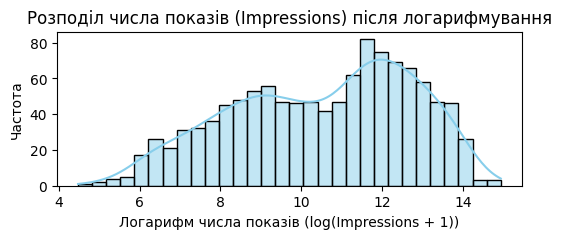

In [20]:
# Побудова графіка розподілу
plt.figure(figsize=(6, 2))
sns.histplot(data['log_Impressions'], kde=True, bins=30, color='skyblue')
plt.title('Розподіл числа показів (Impressions) після логарифмування')
plt.xlabel('Логарифм числа показів (log(Impressions + 1))')
plt.ylabel('Частота')
plt.show()

In [22]:
# Перевірка на нормальність (тест Шапіро-Вілка)
stat, p_value = stats.shapiro(data['log_Impressions'].dropna())
print(f"Тест Шапіро-Вілка: Статистика = {stat}, p-значення = {p_value}")

Тест Шапіро-Вілка: Статистика = 0.9674083869418838, p-значення = 2.4344922949566835e-15
